# I. Kham pha du lieu

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# lay du lieu
tx_data = pd.read_csv('D:\\DA\\Python\\Project\\Retail\\OnlineRetail.csv', encoding='unicode_escape')
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Dat invoicedate la ngay
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

In [5]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Tao cot thang nam
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012


In [7]:
# tinh doanh thu theo thang
tx_data['Revenue'] = tx_data['Quantity'] * tx_data['UnitPrice']
tx_revenue = tx_data.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


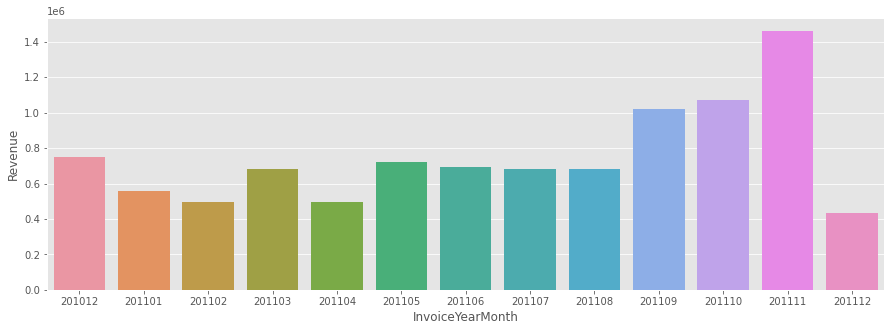

In [8]:
# truc quan 
plt.figure(figsize = (15,5))
plt.style.use('ggplot')
sns.barplot(data = tx_revenue, x = 'InvoiceYearMonth', y = 'Revenue');

In [9]:
# % thay doi doanh thu tung thang
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


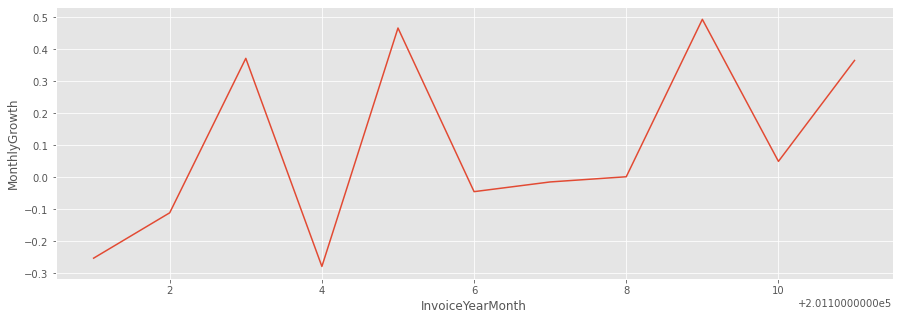

In [10]:
# truc quan 
plt.figure(figsize = (15,5))
plt.style.use('ggplot')
sns.lineplot(data = tx_revenue, x = tx_revenue.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'],
                                y = tx_revenue.query('InvoiceYearMonth < 201112')['MonthlyGrowth']);

In [11]:
# xem xet khach hang o uk
tx_uk = tx_data[tx_data['Country'] == 'United Kingdom']
tx_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,201112,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,201112,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,201112,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,201112,214.80


In [12]:
#tinh khach hang moi tung thang
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


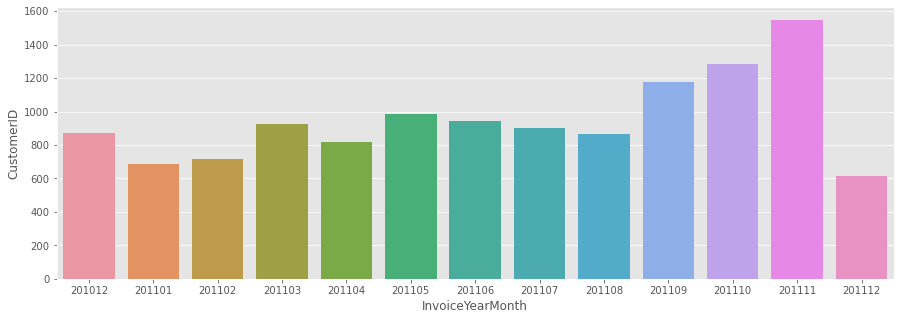

In [13]:
# truc quan 
plt.figure(figsize = (15,5))
plt.style.use('ggplot')
sns.barplot(data = tx_monthly_active, x = 'InvoiceYearMonth', y = 'CustomerID');

In [14]:
#tinh luong dat hang tung thang
tx_monthly_quantity = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
tx_monthly_quantity.head()

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666


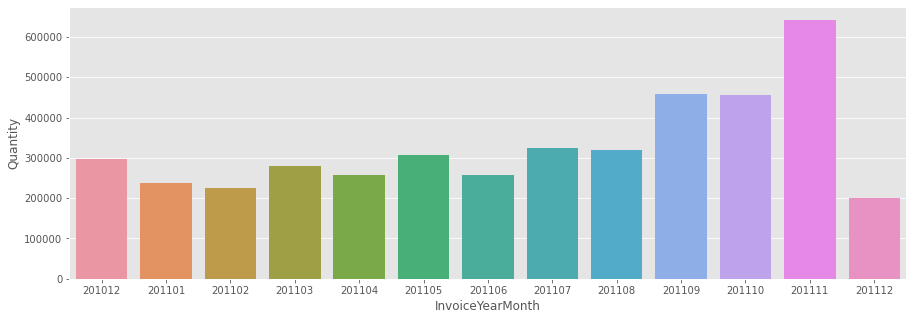

In [15]:
# truc quan 
plt.figure(figsize = (15,5))
plt.style.use('ggplot')
sns.barplot(data = tx_monthly_quantity, x = 'InvoiceYearMonth', y = 'Quantity');

In [16]:
#tinh doanh thu trung bình tung thang
tx_monthly_revenue_mean = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
tx_monthly_revenue_mean.head()

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380


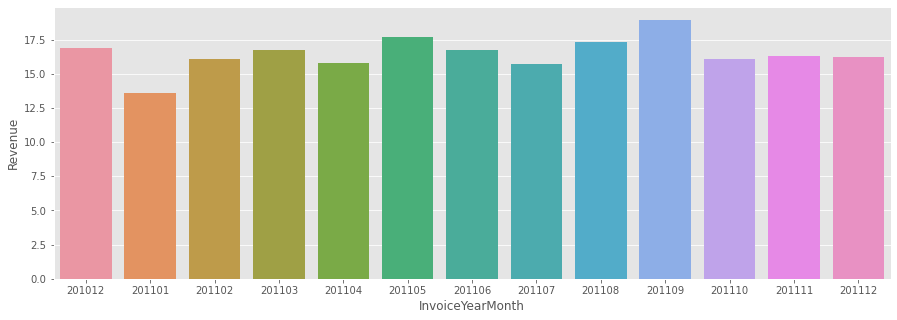

In [17]:
# truc quan 
plt.figure(figsize = (15,5))
plt.style.use('ggplot')
sns.barplot(data = tx_monthly_revenue_mean, x = 'InvoiceYearMonth', y = 'Revenue');

In [18]:
# ti le khach hang moi tung thang
# tinh ngay khach hang mua lan dau tien
tx_min_purchase = tx_uk.groupby('CustomerID')['InvoiceDate'].min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinpurchaseDate']
tx_min_purchase.head()

,CustomerID,MinpurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00


In [19]:
# tính khách hàng mới
tx_min_purchase['MinpurchaseYearMonth'] = tx_min_purchase['MinpurchaseDate'].map(lambda date: 100*date.year + date.month)
tx_min_purchase.head()

,CustomerID,MinpurchaseDate,MinpurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101


In [20]:
tx_uk1 = tx_uk.merge(tx_min_purchase, on = 'CustomerID')
tx_uk1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinpurchaseDate,MinpurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [21]:
# Dat nhan khach hang moi
tx_uk1['UserType'] = 'New'
tx_uk1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinpurchaseDate,MinpurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


In [22]:
# khach hang da ton tai
tx_uk1.loc[tx_uk1['InvoiceYearMonth'] > tx_uk1['MinpurchaseYearMonth'], 'UserType'] = 'Existing'

In [23]:
# doanh thu theo khach hang cu va moi
tx_user_type_revenue = tx_uk1.groupby(['InvoiceYearMonth', 'UserType'])['Revenue'].sum().reset_index()
tx_user_type_revenue.head()

,InvoiceYearMonth,UserType,Revenue
0,201012,New,483799.74
1,201101,Existing,195275.51
2,201101,New,156705.77
3,201102,Existing,220994.63
4,201102,New,127859.00


In [24]:
tx_user_type_revenue = tx_user_type_revenue.query('InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112')
tx_user_type_revenue.head()

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.51
2,201101,New,156705.77
3,201102,Existing,220994.63
4,201102,New,127859.00
5,201103,Existing,296350.03


In [25]:
# tinh bao nhieu khach hang new
tx_uk_new = tx_uk1.query('UserType == "New"')
tx_uk_new_custom = tx_uk_new.groupby('InvoiceYearMonth')['CustomerID'].nunique()
tx_uk_new_custom

InvoiceYearMonth
201012    871
201101    362
201102    339
201103    408
201104    276
201105    252
201106    207
201107    172
201108    140
201109    275
201110    318
201111    296
201112     34
Name: CustomerID, dtype: int64

In [26]:
# tinh bao nhieu khach hang ton tai
tx_uk_Existing = tx_uk1.query('UserType == "Existing"')
tx_uk_Existing_custom = tx_uk_Existing.groupby('InvoiceYearMonth')['CustomerID'].nunique()
tx_uk_Existing_custom

InvoiceYearMonth
201101     322
201102     375
201103     515
201104     541
201105     733
201106     736
201107     727
201108     727
201109     902
201110     967
201111    1252
201112     583
Name: CustomerID, dtype: int64

In [27]:
# ti le khach hang moi tren cu
tx_user_ratio = tx_uk_new_custom / tx_uk_Existing_custom
tx_user_ratio = tx_user_ratio.reset_index().dropna()
tx_user_ratio 

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


# II. Tao phan khuc khach hang theo RFM

## Recency

In [28]:
# tinh xem ngay mua hang gan nhat cua tung khach hang
tx_max_purchase = tx_uk.groupby('CustomerID')['InvoiceDate'].max().reset_index()
tx_max_purchase.columns = ['CustomerID', 'MaxPurchaseDate']
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [29]:
# ngay mua hang gan nhat cua toan bo khach hang
tx_max_purchase.MaxPurchaseDate.max()

Timestamp('2011-12-09 12:49:00')

In [30]:
# so ngay dung mua hang cua tung khach hang
tx_max_purchase['Recency'] = (tx_max_purchase.MaxPurchaseDate.max() - tx_max_purchase.MaxPurchaseDate).dt.days
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [38]:
# lay id khach hang
tx_user = pd.DataFrame(tx_uk['CustomerID'].unique(), columns = ['CustomerID'])
tx_user.head()

,CustomerID
0,17850.0
1,13047.0
2,13748.0
3,15100.0
4,15291.0


In [39]:
# join vs bang tx_max_purchase
tx_user_max_purchase = tx_user.merge(tx_max_purchase[['CustomerID','Recency']], on = 'CustomerID', how = 'inner')
tx_user_max_purchase.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


## Frequency

In [41]:
tx_frequency = tx_uk.groupby('CustomerID')['InvoiceDate'].count().reset_index()
tx_frequency.head()

,CustomerID,InvoiceDate
0,12346.0,2
1,12747.0,103
2,12748.0,4642
3,12749.0,231
4,12820.0,59


## Monetary value

In [42]:
tx_monetary_value = tx_uk.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_monetary_value.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


In [46]:
tx_rfm = pd.merge(tx_user_max_purchase,tx_frequency, on = 'CustomerID')
tx_rfm = pd.merge(tx_rfm,tx_monetary_value, on = 'CustomerID')
tx_rfm.rename(columns={'InvoiceDate':'Frequency', 'Revenue': 'MonetaryValue'}, inplace=True)
tx_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,17850.0,301,312,5288.63
1,13047.0,31,196,3079.10
2,13748.0,95,28,948.25
3,15100.0,329,6,635.10
4,15291.0,25,109,4596.51


## Tao phan khuc khach hang

In [52]:
# Chi dinh phan khuc theo chi so
r_labels = range(4,0,-1)
r_quartiles = pd.cut(tx_rfm['Recency'], 4, labels = r_labels)
tx_rfm = tx_rfm.assign(R = r_quartiles.values)
f_labels = range(1,5)
f_quartiles = pd.cut(tx_rfm['Frequency'], 4, labels = f_labels)
tx_rfm = tx_rfm.assign(F = f_quartiles.values)
m_labels = range(1,5)
m_quartiles = pd.cut(tx_rfm['MonetaryValue'], 4, labels = m_labels)
tx_rfm = tx_rfm.assign(M = m_quartiles.values)
tx_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,17850.0,301,312,5288.63,1,1,1
1,13047.0,31,196,3079.10,4,1,1
2,13748.0,95,28,948.25,3,1,1
3,15100.0,329,6,635.10,1,1,1
4,15291.0,25,109,4596.51,4,1,1


In [54]:
# tao phan khuc dua tren chi so
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
tx_rfm['RFM_segment'] = tx_rfm.apply(join_rfm, axis = 1)
tx_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
0,17850.0,301,312,5288.63,1,1,1,111
1,13047.0,31,196,3079.10,4,1,1,411
2,13748.0,95,28,948.25,3,1,1,311
3,15100.0,329,6,635.10,1,1,1,111
4,15291.0,25,109,4596.51,4,1,1,411


In [55]:
# tao cot chi so dua tren phan khuc
tx_rfm['RFM_score'] = tx_rfm[['R', 'F', 'M']].sum(axis = 1)
tx_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
0,17850.0,301,312,5288.63,1,1,1,111,3
1,13047.0,31,196,3079.10,4,1,1,411,6
2,13748.0,95,28,948.25,3,1,1,311,5
3,15100.0,329,6,635.10,1,1,1,111,3
4,15291.0,25,109,4596.51,4,1,1,411,6


In [58]:
# top cac phan khuc lon nhat co bao nhieu khach hang
tx_rfm.groupby('RFM_score')['CustomerID'].count().reset_index()

,RFM_score,CustomerID
0,3,308
1,4,432
2,5,543
3,6,2657
4,7,5
5,8,3
6,9,2
